import libraries

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


set parameters for visualizations

In [103]:
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

In [104]:
data = pd.read_csv('med-insurance.csv')

In [105]:
data.shape

(1338, 7)

In [106]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

## find the predictor columns that most influence the target column, 'expenses'

problem statement  
predect medical expenses  
factors:   
>    -#age  
>    -#sex  
>    -#bmi ==> body mass index  
>    -#children  
>    -#smoker ==> always at risk when their age reaches 50 or 60  
>    -#region   ==> we don't know much about these, so will look at the relation to the expenses  

Because expenses are numerical and continuous, this problem is a regression problem

# Univariat Analysis  

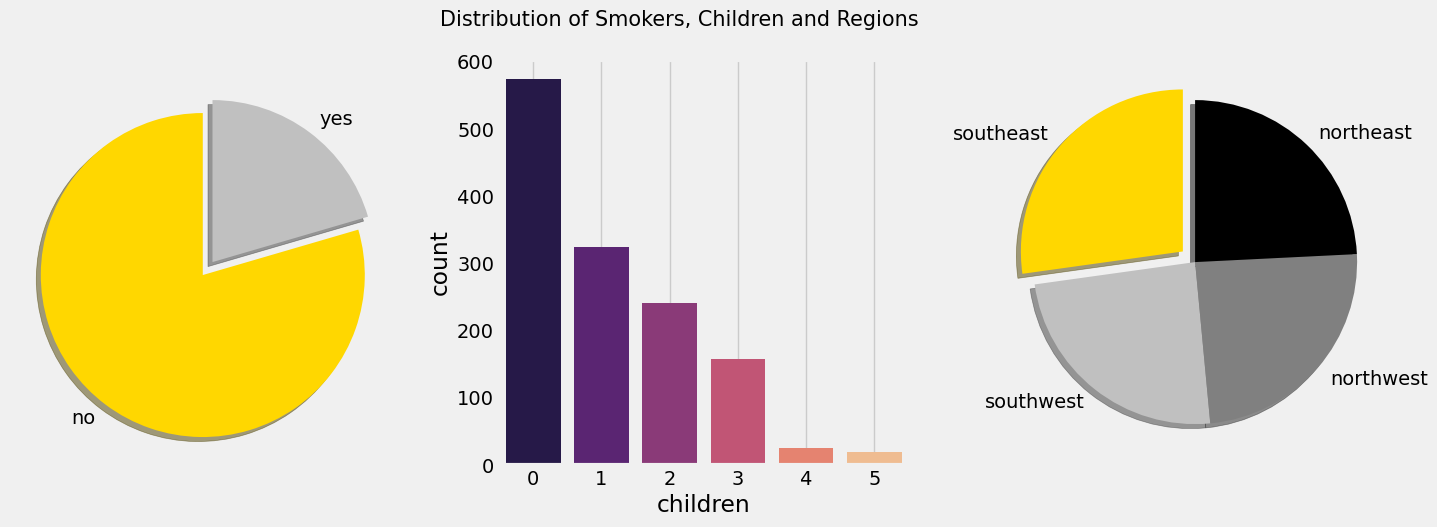

In [107]:
# check the distributions of smoker, children, and region

#the figure and style are in the cell below the library imports

plt.subplot(1,3,1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle=90,
        shadow = True,
        explode = [.1,0])

plt.subplot(1,3,2)
sns.countplot(x=data['children'],palette = 'magma')
plt.grid()

plt.subplot(1,3,3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors=['gold','silver','grey','black'],
        startangle = 90,
        shadow= True,
        explode = [.1,0,0,0])
plt.suptitle('Distribution of Smokers, Children and Regions',fontsize = 15)
plt.show()

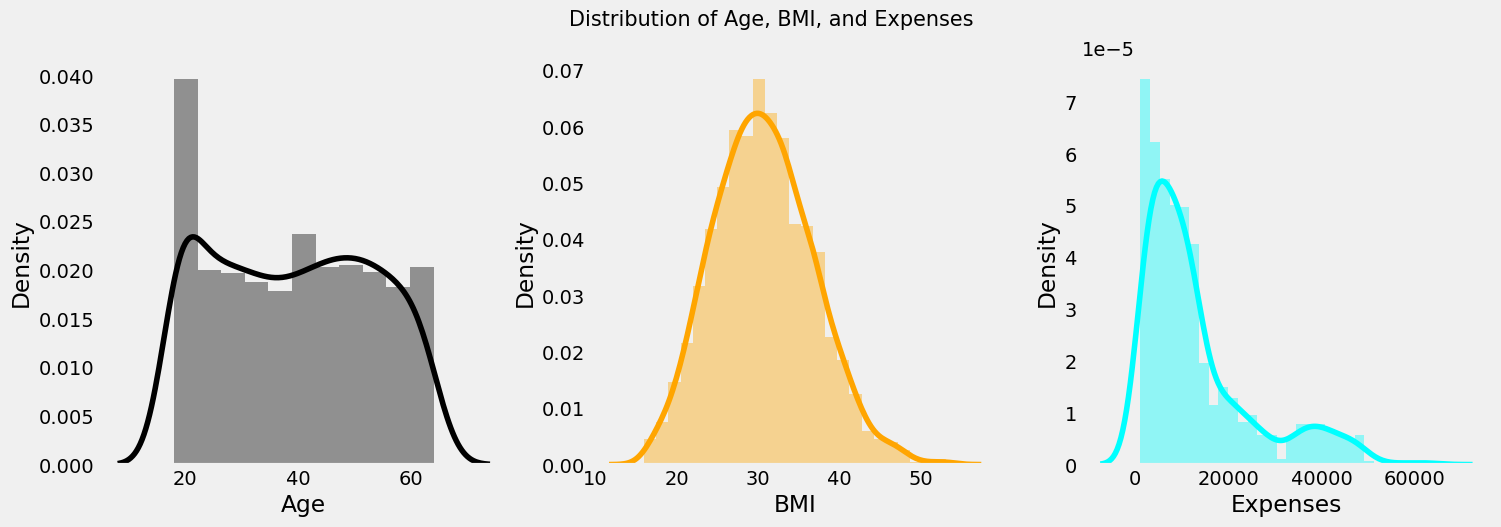

In [108]:
# check the distribution of age, bmi, and expenses
plt.subplot(1,3,1)
sns.distplot(data['age'],color = 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1,3,2)
sns.distplot(data['bmi'],color='orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1,3,3)
sns.distplot(data['expenses'],color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses',fontsize = 15)
plt.show()

# transform expenses with log transformation

In [109]:
data['sqrt(expenses)']=data['expenses'].apply(lambda x: np.log(x))
data.drop(columns='expenses',inplace=True)
data=data.rename(columns={'sqrt(expenses)': 'expenses'})

# Bivariate Analysis  

In [110]:
# look at the impact of age and medical expenses
px.scatter(data,
           y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols')



In [111]:
# look at the impact of bmi on medical expenses
px.scatter(data,y='expenses',
           x= 'bmi',
           marginal_y = 'violin',
           trendline = 'ols')

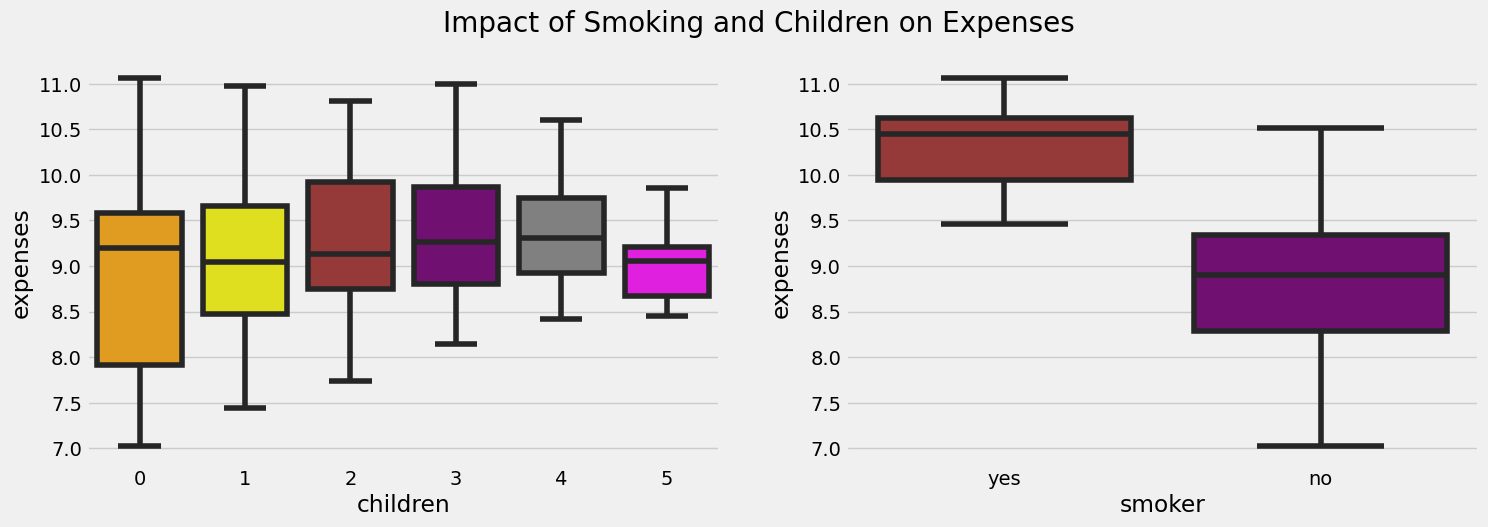

In [112]:
# look at the impact of smoking and children on medical expenses
colors=['orange','yellow','brown','purple','grey','magenta']

plt.subplot(1,2,1)
sns.boxplot(x=data['children'],y=data['expenses'],palette=colors)

plt.subplot(1,2,2)
sns.boxplot(x=data['smoker'],y=data['expenses'],palette=colors[2:4])

plt.suptitle('Impact of Smoking and Children on Expenses',fontsize = 20)
plt.show()

In [113]:
data['children'] = data['children'].replace((4, 5), (3, 3))
data['children'].value_counts()

children
0    574
1    324
2    240
3    200
Name: count, dtype: int64

# Multivariate analysis

In [114]:
px.scatter(data,
           x='expenses',y='age', 
           facet_row='children',   # add facet layers
           facet_col='region',
           color='smoker',
           trendline='ols')

In [115]:
px.scatter(data,
           x='expenses',y='bmi', 
           facet_row='children',   # add facet layers
           facet_col='region',
           color='smoker',
           trendline='ols')

In [116]:
# bubble chart
px.scatter(data,
           x='expenses',
           y='bmi',
           size='age',
           color='smoker',
           hover_name='expenses',
           size_max=15)

In [ ]:
data['region']=data['region'].replace(('southeast','southwest','northwest','northeast'),(3,1,2,4))
data['sex']=data['sex'].replace(('male','female'),(2,1))

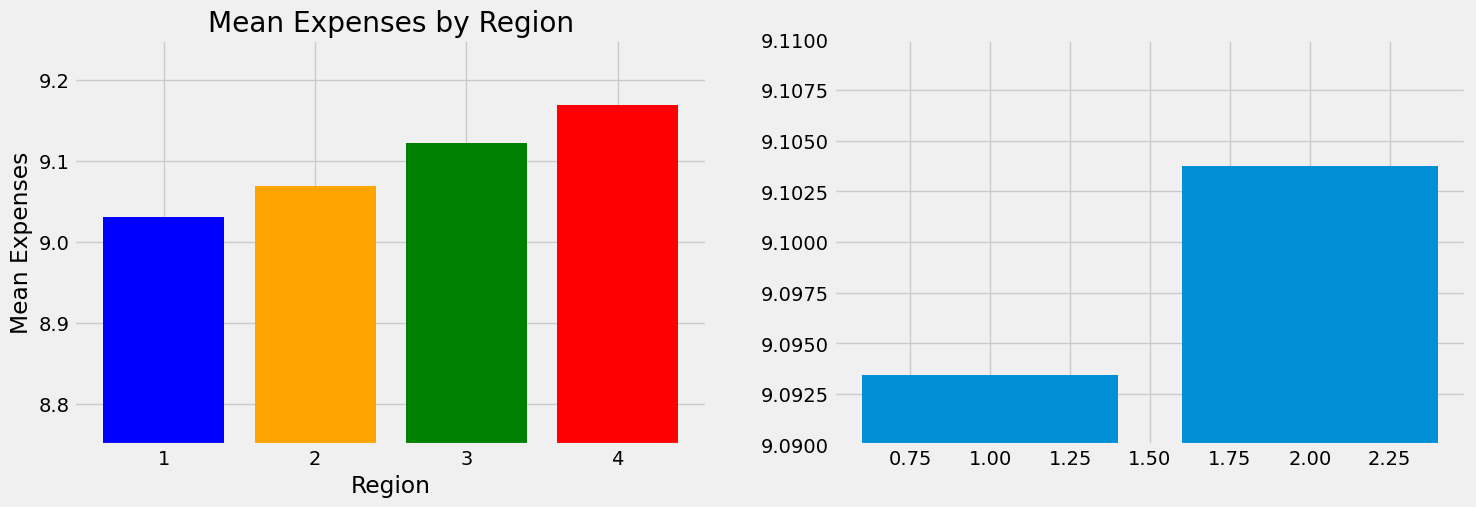

In [171]:
sex_means = {2:data.loc[data['sex']==2]['expenses'].mean(),1:data.loc[data['sex']==1]['expenses'].mean()}
sex_df = pd.DataFrame(list(sex_means.items()),columns=('sex','Mean Expenses'))

reg_means = {1: data.loc[data['region'] == 1]['expenses'].mean(),
       2: data.loc[data['region'] == 2]['expenses'].mean(),
       3: data.loc[data['region'] == 3]['expenses'].mean(),
       4: data.loc[data['region'] == 4]['expenses'].mean()}
reg_df = pd.DataFrame(list(reg_means.items()), columns=['Region', 'Mean Expenses'])

# Plot bar chart
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.bar(reg_df['Region'], reg_df['Mean Expenses'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Region')
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses by Region')
plt.xticks(reg_df['Region'])  # Ensure correct tick labels
plt.ylim(8.75,9.25)

plt.subplot(1,2,2)
plt.bar(sex_df['sex'],sex_df['Mean Expenses'])
plt.ylim(9.09,9.11)
plt.show()

# prepare for modeling

encode categorical columns

In [119]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,9.734176
1,18,male,33.8,1,no,southeast,7.453301
2,28,male,33.0,3,no,southeast,8.400538
3,33,male,22.7,0,no,northwest,9.998092
4,32,male,28.9,0,no,northwest,8.260198


In [ ]:
data['smoker']=data['smoker'].replace(('yes','no'),(2,1))
data.select_dtypes('object').columns

Index([], dtype='object')

In [121]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,9.734176
1,18,2,33.8,1,1,3,7.453301
2,28,2,33.0,3,1,3,8.400538
3,33,2,22.7,0,1,2,9.998092
4,32,2,28.9,0,1,2,8.260198


split data

In [122]:
y=data['expenses']
X=data.drop(['expenses'],axis=1)
print(y.shape)
print(X.shape)

(1338,)
(1338, 6)


In [123]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


feature scaling

In [124]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)   

linear regression

In [125]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(x_train,y_train)

y_pred1=model1.predict(x_test)

analyze performance

In [126]:
from sklearn.metrics import r2_score,mean_squared_error

mse= mean_squared_error(y_test,y_pred1)
rmse= np.sqrt(mse)
print('RMSE: ',rmse)

r2score1=r2_score(y_test,y_pred1)
print('R2 Score: ',r2score1)

RMSE:  0.4251101702598577
R2 Score:  0.7847995193988754


random forest model

In [127]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

In [128]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt(mse)

r2score2= r2_score(y_test,y_pred2)

print(f'rmse: {rmse}, r2 score: {r2score2}')

rmse: 0.34537712259974657, r2 score: 0.8579545324119825


gradient boosting

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)

In [130]:
from sklearn.metrics import r2_score, mean_squared_error

mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mse)
r2score3=r2_score(y_test,y_pred3)
print(f'rmse: {rmse}, r2score: {r2score3}')


rmse: 0.32889740820855684, r2score: 0.8711865686909472


Ensemble


In [131]:
avg_model = (y_pred1+y_pred2+y_pred3)/3

from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test,avg_model)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,avg_model)
print(f'rmse: {rmse}, r2score: {r2score}')


rmse: 0.33784063287148397, r2score: 0.8640860574013072


In [132]:
#weighted average model for accurace 

weight_avg_model=0.2*y_pred1+0.3*y_pred2+0.5*y_pred3
from sklearn.metrics import r2_score, mean_squared_error
mse=mean_squared_error(y_test,weight_avg_model)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,weight_avg_model)

print(f'rmse: {rmse}, r2score: {r2score}')

rmse: 0.33035042854672253, r2score: 0.8700458970264138


cross validation

In [133]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3,X,y,cv=5)
print(f'mean: {np.mean(scores)}, scores: {scores}')

mean: 0.8301900388833028, scores: [0.87520388 0.73607899 0.90130436 0.83814017 0.80022279]


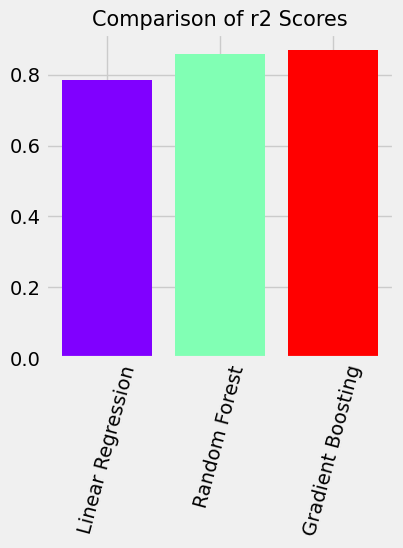

In [134]:
r2_scores=np.array([r2score1,r2score2,r2score3])
labels=np.array(['Linear Regression','Random Forest','Gradient Boost'])
index = np.argsort(r2_scores)
color= plt.cm.rainbow(np.linspace(0,1,len(r2_scores)))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(4,4)

plt.bar(range(len(index)),r2_scores[index],color=color)
plt.xticks(range(0,3),['Linear Regression','Random Forest','Gradient Boosting'],rotation=75)
plt.title('Comparison of r2 Scores',fontsize=15)
plt.show()